# Physics 453: Spin Precession


## Larmor (Spin) Precession
In this notebook we will look at what happens to the spin of an electron when it is exposed to a uniform, constant magnetic field.  This will allow us to practice some concepts from Chapter 3 of Griffiths, such as performing a change of basis, working with orthonormal states, and diagonalizing Hamiltonians.

The Hamiltonian for a magnetic dipole in a uniform magnetic field is
$$H=-\vec{\mu}\cdot \vec{B}$$
The magentic dipole of an electron is given by
$$ \vec{\mu} = \gamma \vec{S}$$
Where $\gamma$ is the gyromagnetic ratio of the electron.  The precise value of $\gamma$ is calculated with quantum field theory, and is approximately given by
$$\gamma \approx 2\left( 1 + \frac{\alpha}{2\pi}\right)$$
where $\alpha$ is the fine-structure constant, $\alpha \approx 1/137$.  The spin vector is given in terms of the Pauli matrices,
$$ \vec{S} = \frac{\hbar}{2}\vec{\sigma}$$
Thus, the Hamiltonian for the spin of an electron in a magnetic field is
$$ H = -\gamma \frac{\hbar}{2}\sum_i \sigma_i B_i$$
where $i=x,y,z$.

In this notebook, assume that $\hbar=1$ and $|B|=3T$.

### References
Larmor Precession, Griffiths, Chapter 4, page 178

Changing Bases, Griffiths, Appendix A.4

Pauli matrices, https://en.wikipedia.org/wiki/Pauli_matrices

Scipy "eigh" function, https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh



### Coding up the Hamiltonian
Let's start by loading up the libraries we'll need, and then set the magnetic field strength equal to $|B|=3T$.

In [3]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy
import numpy.linalg
import math

In [4]:
B=3    #Magnetic field strength
alpha = 1./137   # Fine structure constant
g = 2*(1+alpha/(2*numpy.pi)) # gyromagnetic ratio
hbar = 1   #Planck's constant

#### Question 1
Assume that the magnetic field vector lies in the y-z plane, and that it makes an angle of $\theta$ with the z-axis.  Finish these three functions to return the Pauli matrices, the magnetic field vector, and the Hamiltonian. In order to check your work, make sure that the Hamiltonian calculated for $|B|=3T$ and $\theta=\pi/4$ is correct. 

In [5]:
def pauli_matrices():    
    sig_x = numpy.matrix([ [0,1], [1,0] ])
    sig_y = numpy.matrix([ [0,-1j], [1j,0] ])
    sig_z = numpy.matrix([ [1,0], [0,-1] ])
    
    sigmas = numpy.array([sig_x, sig_y, sig_z])
    return sigmas

def magnetic_field(theta, B):
    return numpy.array([0, numpy.sin(theta)*B, numpy.cos(theta)*B])

def Hamiltonian(theta, B):
    sigmas = pauli_matrices()
    B_vector = magnetic_field(theta, B)
    H = -g/2*numpy.tensordot(sigmas, B_vector, axes=([0],[0]))
    return H

theta_check = numpy.pi / 4
print("H= ",Hamiltonian(theta_check,B))

H=  [[-2.12378471+0.j          0.00000000+2.12378471j]
 [-0.00000000-2.12378471j  2.12378471-0.j        ]]


## Diagonalizing the Hamiltonian
The Pauli matrices are usually written in the $S_z$ basis, so the above Hamiltonian will not be diagonal if the magnetic field is not along the z axis. In order to find the eigen-energies and eigen-states for the electron in the magnetic field, we can use [Scipy's "eigh" function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh). 
#### Question 2
Use "eigh" to find the energies and eigenstates for $\theta=\pi/3$ and $|B|=3T$.  The eigenstates are returned in a matrix, $\Psi$, where each column is an eigenstate. The eigenstates should be orthonormal, so that $\Psi^\dagger \Psi=I$.  Check that this is true.

In [6]:
H = Hamiltonian(numpy.pi/3, B)
print(H)
(energies, eigenstates) = numpy.linalg.eigh(H)
print("E=",energies)
print("Psi=\n",eigenstates)
print("Psi.conj.T*Psi=\n",numpy.dot(eigenstates.conj().T, eigenstates))

[[-1.50174257+0.j          0.00000000+2.60109444j]
 [-0.00000000-2.60109444j  1.50174257-0.j        ]]
E= [-3.00348514  3.00348514]
Psi=
 [[-0.8660254-0.j        -0.5000000+0.j       ]
 [ 0.0000000-0.5j        0.0000000+0.8660254j]]
Psi.conj.T*Psi=
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j]]


Each eigenstate obeys the time independent Schrodinger equation. 
$$H\psi_i=E_i\psi_i$$
In this equation $E$ is a scalar value.  We could write this equation for each eigenstate, but a more compact way to express that is as a matrix equation.
$$ H\Psi = \Psi E$$
Where now $E$ is a diagonal matrix with element $E(i,i)$ is the energy of the $i$th eigenstate. Up above we showed that $\Psi^\dagger \Psi=I$, which means that $\Psi^\dagger = \Psi^{-1}$.  Therefore
$$\Psi^{-1}H\Psi = \Psi^{\dagger}H\Psi = E$$
So $\Psi$ is the transformation matrix that diagonalizes the Hamiltonian!
#### Question 3
Check that $\Psi^{\dagger}H\Psi = E$ yields a diagonal matrix.

In [7]:
print(numpy.dot(eigenstates.conj().T,numpy.dot(H,eigenstates)))

[[-3.00348514+0.j  0.00000000+0.j]
 [ 0.00000000+0.j  3.00348514+0.j]]


## Time Evolution of Probabilities
Let's suppose that at $t=0$, the electron is measured to have $S_z=\hbar/2$, so that it's state is $\chi(0)=|\uparrow>_z$. In the z-basis 
$$\chi(0)_z = \left( \begin{array}{ccc}
1 \\
0  \end{array} \right)_z=1*|\uparrow>_z+0*|\downarrow>_z$$

However, we could also write our states in the basis of the eigenvectors, where the spin-up state means the spin points along the direction of the magnetic field, where
$$\chi(0)_B = \left( \begin{array}{ccc}
a \\
b  \end{array} \right)_B =a*|\uparrow>_B+b*|\downarrow>_B$$
and $a^2+b^2=1$.  

How do we get from one basis to the other?  We transform the state with the same transformation matrix that we used for the Hamiltonian, the matrix of eigenvectors.
$$ \chi(0)_B = \Psi^\dagger \chi(0)_z$$

#### Question 4
Given that $\chi(0)=|\uparrow>_z$, what is $\chi(0)$ in the B basis if $\theta=\pi/5$? 


In [8]:
H = Hamiltonian(numpy.pi/5, B)
(energies, eigenstates) = numpy.linalg.eigh(H)
psi_0_zbasis = numpy.matrix([[1],[0]])
psi_0_Bbasis = numpy.dot(eigenstates.conj().T, psi_0_zbasis)
print("chi(0)_z=\n",psi_0_zbasis)
print("chi(0)_B=\n",psi_0_Bbasis)

chi(0)_z=
 [[1]
 [0]]
chi(0)_B=
 [[-0.95105652+0.j]
 [-0.30901699+0.j]]


Now that we have the initial state in the B basis, the eigenstate basis, we can easily find the time evolution of the state. 
$$\chi(t)_B = \left( \begin{array}{ccc}
a*e^{-iE_\uparrow t/\hbar} \\
b*e^{-iE_\downarrow t/\hbar}  \end{array} \right)_B =a*e^{-iE_\uparrow t/\hbar}|\uparrow>_B+b*e^{-iE_\downarrow t/\hbar}|\downarrow>_B$$
and $a^2+b^2=1$.  

#### Question 5
Write a function to calculate $\chi(t)_B$ from $\chi(0)_B$, the eigen-energies, and the time.  Print out $\chi(t=5)_B$ for $\theta=\pi/3$.

In [10]:
H = Hamiltonian(numpy.pi/3, B)
(energies, eigenstates) = numpy.linalg.eigh(H)
psi_0_zbasis = numpy.matrix([[1],[0]])
psi_0_Bbasis = numpy.dot(eigenstates.conj().T, psi_0_zbasis)

def get_psi_t_Bbasis(energies, psi_0_Bbasis, time):
    psi_t_Bbasis = numpy.matrix(numpy.zeros_like(psi_0_Bbasis))
    for i in range(0, len(energies)):
        psi_t_Bbasis[i,0] = psi_0_Bbasis[i,0]*numpy.exp(-1j*energies[i]*time)
    return psi_t_Bbasis

print(H)
print("chi(t=5)_B=\n",get_psi_t_Bbasis(energies, psi_0_Bbasis, 5))

[[-1.50174257+0.j          0.00000000+2.60109444j]
 [-0.00000000-2.60109444j  1.50174257-0.j        ]]
chi(t=5)_B=
 [[ 0.66762222-0.55161633j]
 [ 0.38545187+0.31847583j]]


The probability at time $t$ for measuring the electron to have spin up in the z-direction is
$$ P(S_z=\hbar/2, t) = |<\chi(0)_B|\chi(t)_B>|^2$$

#### Question 6
Make a plot of $P(S_z=\hbar/2, t)$ for $t=0..3$ for $\theta = \pi/2, \pi/4, \pi/6$.

<IPython.core.display.Javascript object>


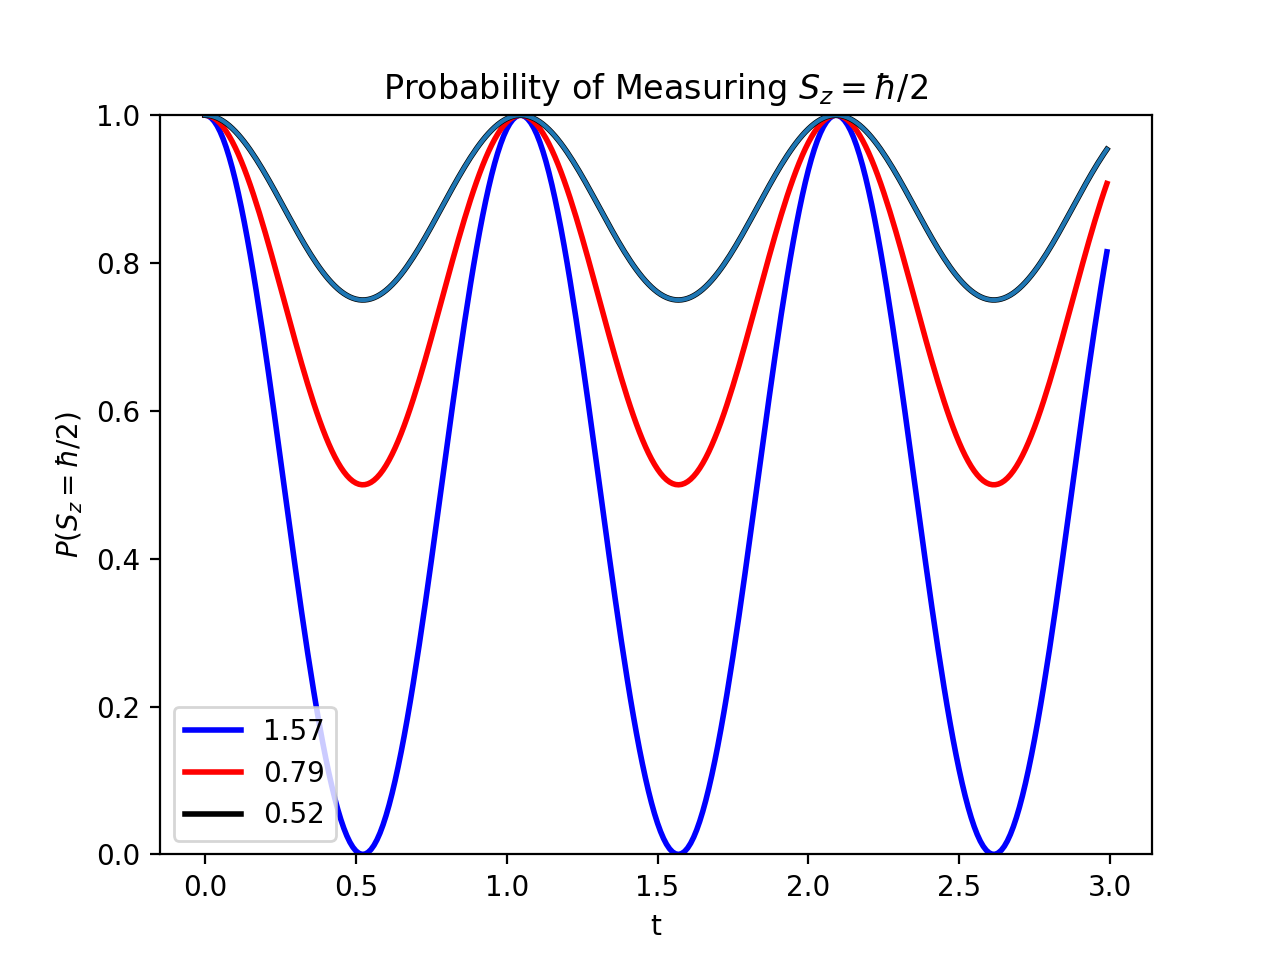

In [11]:
t = numpy.arange(0,3,0.01)
thetas = [numpy.pi/2, numpy.pi/4, numpy.pi/6]
colors = ['blue','red','black']

plt.figure()
for k in range(0, len(thetas)):
    theta = thetas[k]
    (energies, eigenstates) = numpy.linalg.eigh( Hamiltonian(theta, B) )
    prob_sz_up = numpy.zeros_like(t)
    psi_0_zbasis = numpy.matrix([[1],[0]])
    psi_0_Bbasis = numpy.dot( eigenstates.conj().T, psi_0_zbasis )
    for i in range(0, len(t)):
        psi_t_Bbasis = get_psi_t_Bbasis(energies, psi_0_Bbasis, t[i])
        overlap = numpy.dot(psi_t_Bbasis.conj().T, psi_0_Bbasis)[0,0]
        prob_sz_up[i] = (numpy.conjugate(overlap)*overlap).real
    plt.plot(t, prob_sz_up, color=colors[k], lw=2, label=str("%.2f" %theta))
    

plt.plot(t, prob_sz_up)
plt.xlabel("t")
plt.ylabel(r"$P(S_z=\hbar/2)$")
plt.title(r"Probability of Measuring $S_z=\hbar/2$")
plt.legend()
plt.ylim([0,1])
plt.savefig("ProbSzUp_Solution.png")
plt.show()

#### Question 7
Explain why the probability curves behave the way they do as a function of $\theta$.

The spin precesses about the magnetic field vector, $\vec{B}$.  Since energy is conserved in the system, the magnetic field just exerts a torque on the dipole that causes the expectation value of the spin to trace a circle around the field.  This is mimics the classical behavior of a dipole in a magnetic field, which makes it an example of Ehrenfest's theorem.  Simply put, Ehrenfest's theorem says that expectations values of quantum observables obey the classical equations of motion.  But keep in mind that this is just the expecation values!  Any individual measurement is still subject to the probabilities predicted by quantum mechanics.